In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
%pylab inline
pd.set_option("display.max_columns", 200)
pylab.rcParams['figure.figsize'] = 10, 5
pd.options.mode.chained_assignment = None

Populating the interactive namespace from numpy and matplotlib


In [2]:
dados = pd.read_csv("2004-2019.tsv", sep = '\t')

In [3]:
dados.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [4]:
dados['PRODUTO'].value_counts()

GASOLINA COMUM      21194
ÓLEO DIESEL         21194
GLP                 21186
ETANOL HIDRATADO    21102
GNV                 13034
ÓLEO DIESEL S10      9113
Name: PRODUTO, dtype: int64

In [5]:
diesel = dados[dados['PRODUTO'] == 'ÓLEO DIESEL'].copy()

In [6]:
diesel.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
43547,43547,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ÓLEO DIESEL,125,R$/l,1.447,0.031,1.350,1.490,0.198,0.021,1.249,0.012,1.2153,1.2817,0.01,5,2004
43548,43548,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ÓLEO DIESEL,373,R$/l,1.437,0.059,1.300,1.660,0.157,0.041,1.28,0.024,1.2119,1.3801,0.019,5,2004
43549,43549,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ÓLEO DIESEL,190,R$/l,1.600,0.061,1.460,1.790,0.195,0.038,1.405,0.06,1.22,1.549,0.043,5,2004
43550,43550,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ÓLEO DIESEL,157,R$/l,1.526,0.045,1.399,1.659,0.163,0.029,1.363,0.022,1.3055,1.4407,0.016,5,2004
43551,43551,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ÓLEO DIESEL,105,R$/l,1.362,0.025,1.310,1.450,0.146,0.018,1.216,0.02,1.1768,1.272,0.016,5,2004


# Validação

In [7]:
diesel['DATA INICIAL'] = pd.to_datetime(diesel['DATA INICIAL'])
diesel['DATA FINAL'] = pd.to_datetime(diesel['DATA FINAL'])

In [8]:
(diesel['DATA FINAL']  - diesel['DATA INICIAL']).value_counts()

6 days    21194
dtype: int64

In [9]:
diesel_treino = diesel[diesel['DATA FINAL'] < "2011-01-01"]
diesel_valid = diesel[diesel['DATA FINAL'] >= "2011-01-01"]
diesel_treino.shape, diesel_valid.shape

((9233, 21), (11961, 21))

# Baseline

In [10]:
y_treino = diesel_treino['PREÇO MÉDIO REVENDA']
y_valid = diesel_valid['PREÇO MÉDIO REVENDA']

In [11]:
baseline_treino = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].shift(1)
baseline_valid = diesel_valid.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].shift(1)

In [12]:
diesel_treino['baseline'] = baseline_treino

In [13]:
diesel_treino[diesel_treino['ESTADO'] == 'SAO PAULO'].head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO,baseline
43570,43570,2004-05-09,2004-05-15,SUDESTE,SAO PAULO,ÓLEO DIESEL,3196,R$/l,1.368,0.057,1.210,1.590,0.158,0.042,1.21,0.026,1.141,1.369,0.021,5,2004,NaN
43597,43597,2004-05-16,2004-05-22,SUDESTE,SAO PAULO,ÓLEO DIESEL,3201,R$/l,1.368,0.057,1.239,1.599,0.158,0.042,1.21,0.026,1.125,1.369,0.021,5,2004,1.368
43624,43624,2004-05-23,2004-05-29,SUDESTE,SAO PAULO,ÓLEO DIESEL,3216,R$/l,1.368,0.057,1.220,1.590,0.159,0.042,1.209,0.025,1.125,1.369,0.021,5,2004,1.368
43651,43651,2004-05-30,2004-06-05,SUDESTE,SAO PAULO,ÓLEO DIESEL,3200,R$/l,1.368,0.057,1.220,1.669,0.159,0.042,1.209,0.025,1.125,1.369,0.021,5,2004,1.368
43678,43678,2004-06-06,2004-06-12,SUDESTE,SAO PAULO,ÓLEO DIESEL,3222,R$/l,1.369,0.056,1.220,1.590,0.159,0.041,1.21,0.025,1.125,1.369,0.021,6,2004,1.368


In [14]:
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(y_valid[baseline_valid.notnull()], 
                               baseline_valid[baseline_valid.notnull()]))

0.008133639513965776

In [15]:
0.008133639513965776 * 100

0.8133639513965776

# Machine Learning

In [16]:
diesel_treino.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO,baseline
43547,43547,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ÓLEO DIESEL,125,R$/l,1.447,0.031,1.350,1.490,0.198,0.021,1.249,0.012,1.2153,1.2817,0.01,5,2004,NaN
43548,43548,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ÓLEO DIESEL,373,R$/l,1.437,0.059,1.300,1.660,0.157,0.041,1.28,0.024,1.2119,1.3801,0.019,5,2004,NaN
43549,43549,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ÓLEO DIESEL,190,R$/l,1.600,0.061,1.460,1.790,0.195,0.038,1.405,0.06,1.22,1.549,0.043,5,2004,NaN
43550,43550,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ÓLEO DIESEL,157,R$/l,1.526,0.045,1.399,1.659,0.163,0.029,1.363,0.022,1.3055,1.4407,0.016,5,2004,NaN
43551,43551,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ÓLEO DIESEL,105,R$/l,1.362,0.025,1.310,1.450,0.146,0.018,1.216,0.02,1.1768,1.272,0.016,5,2004,NaN


In [17]:
df_X_treino = pd.DataFrame(index=diesel_treino.index)
df_X_valid = pd.DataFrame(index=diesel_valid.index)

## Target

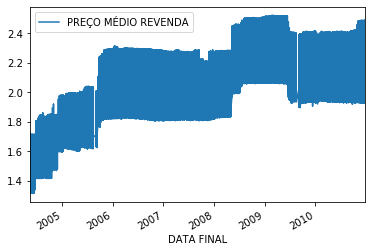

In [18]:
diesel_treino.plot(x='DATA FINAL', y='PREÇO MÉDIO REVENDA')

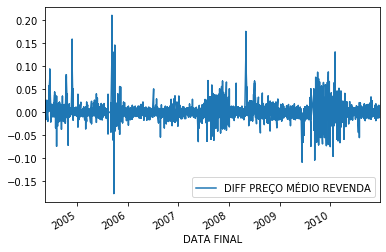

In [19]:
def target_diff(x):
    return x.diff().shift(-1)

diesel_treino['DIFF PREÇO MÉDIO REVENDA'] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)

diesel_treino.plot(x='DATA FINAL', y='DIFF PREÇO MÉDIO REVENDA')

In [20]:
df_X_treino['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)
df_X_valid['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'] = diesel_valid.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)

### Sazonal

In [21]:
df_X_treino['MES'] = diesel_treino['DATA FINAL'].dt.month
df_X_treino['DIA'] = diesel_treino['DATA FINAL'].dt.day
df_X_treino['DIA_DA_SEMANA'] = diesel_treino['DATA FINAL'].dt.weekday
df_X_treino['DIA_DO_ANO'] = diesel_treino['DATA FINAL'].dt.dayofyear


df_X_valid['MES'] = diesel_valid['DATA FINAL'].dt.month
df_X_valid['DIA'] = diesel_valid['DATA FINAL'].dt.day
df_X_valid['DIA_DA_SEMANA'] = diesel_valid['DATA FINAL'].dt.weekday
df_X_valid['DIA_DO_ANO'] = diesel_valid['DATA FINAL'].dt.dayofyear

In [22]:
df_X_treino.head()

,DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DA_SEMANA,DIA_DO_ANO
43547,0.013,5,15,5,136
43548,0.001,5,15,5,136
43549,-0.003,5,15,5,136
43550,-0.002,5,15,5,136
43551,-0.003,5,15,5,136


### Lag

In [23]:
df_X_treino['PRECO_MEDIO_REVENDA_ATUAL'] = diesel_treino['PREÇO MÉDIO REVENDA']
df_X_valid['PRECO_MEDIO_REVENDA_ATUAL'] = diesel_valid['PREÇO MÉDIO REVENDA']

### Diferença do Lag

**Diff_LAG = Yt-1 - Yt-2**

In [24]:
df_X_treino['DIFF_PRECO_MEDIO_REVENDA_ATUAL'] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].diff()
df_X_valid['DIFF_PRECO_MEDIO_REVENDA_ATUAL'] = diesel_valid.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].diff()

### Média Móvel

In [36]:
roll = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].rolling(4).mean()
roll.head()

ESTADO       
ACRE    43560       NaN
        43587       NaN
        43614       NaN
        43641    1.7165
        43668    1.7140
Name: PREÇO MÉDIO REVENDA, dtype: float64

In [37]:
roll.reset_index(level=0, drop=True).head()

43560       NaN
43587       NaN
43614       NaN
43641    1.7165
43668    1.7140
Name: PREÇO MÉDIO REVENDA, dtype: float64

In [27]:
df_X_treino['MEDIA_MOVEL_PRECO_MEDIO_REVENDA_4_SEMANAS'] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].rolling(4).mean().reset_index(level=0, drop=True)
df_X_valid['MEDIA_MOVEL_PRECO_MEDIO_REVENDA_4_SEMANAS'] = diesel_valid.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].rolling(4).mean().reset_index(level=0, drop=True)

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
df_X_treino.head()

,DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DA_SEMANA,DIA_DO_ANO,PRECO_MEDIO_REVENDA_ATUAL,DIFF_PRECO_MEDIO_REVENDA_ATUAL,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_4_SEMANAS
43547,0.013,5,15,5,136,1.447,NaN,NaN
43548,0.001,5,15,5,136,1.437,NaN,NaN
43549,-0.003,5,15,5,136,1.600,NaN,NaN
43550,-0.002,5,15,5,136,1.526,NaN,NaN
43551,-0.003,5,15,5,136,1.362,NaN,NaN


In [30]:
df_X_treino = df_X_treino.dropna()
df_X_valid = df_X_valid.dropna()

In [38]:
Xtr, ytr = df_X_treino.drop(['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'], axis=1), df_X_treino['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA']
Xval, yval = df_X_valid.drop(['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'], axis=1), df_X_valid['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA']

Xtr.isnull().mean()

MES                                          0.0
DIA                                          0.0
DIA_DA_SEMANA                                0.0
DIA_DO_ANO                                   0.0
PRECO_MEDIO_REVENDA_ATUAL                    0.0
DIFF_PRECO_MEDIO_REVENDA_ATUAL               0.0
MEDIA_MOVEL_PRECO_MEDIO_REVENDA_4_SEMANAS    0.0
dtype: float64

In [32]:
mdl = RandomForestRegressor(n_jobs=-1, random_state=0, n_estimators=500)
mdl.fit(Xtr, ytr)
p = mdl.predict(Xval)

In [33]:
p_final = Xval['PRECO_MEDIO_REVENDA_ATUAL'] + p
yval_final = Xval['PRECO_MEDIO_REVENDA_ATUAL'] + yval

np.sqrt(mean_squared_log_error(yval_final, p_final)) * 100

0.8344905526219556

modelo = 0.8344905526219556  
baseline = 0.8133639513965776

# Sequential Forward Feature Selection


In [34]:
var_menor_erro = None
valor_menor_erro = 1000.

for var in Xtr.columns:
    mdl = RandomForestRegressor(n_jobs=-1, random_state=0, n_estimators=500)
    mdl.fit(Xtr[[var]], ytr)
    p = mdl.predict(Xval[[var]])
    
    p_final = Xval['PRECO_MEDIO_REVENDA_ATUAL'] + p
    yval_final = Xval['PRECO_MEDIO_REVENDA_ATUAL'] + yval

    erro = np.sqrt(mean_squared_log_error(yval_final, p_final)) * 100
    
    print("Variável: {} - Erro: {:.4f}\n".format(var, erro))
    
    if erro < valor_menor_erro:
        var_menor_erro = var
        valor_menor_erro = erro
        
print("Melhor Variável: {} - Erro: {:.4f}\n".format(var_menor_erro, valor_menor_erro))
    

Variável: MES - Erro: 0.8092

Variável: DIA - Erro: 0.8194

Variável: DIA_DA_SEMANA - Erro: 0.8115

Variável: DIA_DO_ANO - Erro: 0.8924

Variável: PRECO_MEDIO_REVENDA_ATUAL - Erro: 0.8271

Variável: DIFF_PRECO_MEDIO_REVENDA_ATUAL - Erro: 0.8345

Variável: MEDIA_MOVEL_PRECO_MEDIO_REVENDA_4_SEMANAS - Erro: 0.8409

Melhor Variável: MES - Erro: 0.8092



baseline = 0.8133639513965776

Variável: MES - Erro: 0.8092

Variável: DIA - Erro: 0.8194

Variável: DIA_DA_SEMANA - Erro: 0.8115

Variável: DIA_DO_ANO - Erro: 0.8924

Variável: PRECO_MEDIO_REVENDA_ATUAL - Erro: 0.8271

Variável: DIFF_PRECO_MEDIO_REVENDA_ATUAL - Erro: 0.8345

Variável: MEDIA_MOVEL_PRECO_MEDIO_REVENDA_4_SEMANAS - Erro: 0.8409

Melhor Variável: MES - Erro: 0.8092